In [42]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
import datetime as dt
from pandas.tseries.offsets import MonthEnd
import requests
import numpy as np
import random
import time
import os

In [99]:
# Import libraries
import os
import sys
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report



In [28]:
#opening the csv and turning it into a list and cleaning the bad tickers
stocks = pd.read_csv('newest_stocks.csv')
bad = []
tickers = list(stocks['TD Stocks Screener Results'])
print(len(tickers))
for i in tickers:
    for e in i:
        if e not in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
            
            bad.append(i)
            
bad = set(bad)
for b in bad:
    tickers.remove(b)
print(len(tickers))

3468
3447


In [13]:
def tech_adders(df):
    df['price change'] = df['close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg up'] = df['Upmove'].ewm(span=19).mean()
    df['avg down'] = df['Downmove'].ewm(span=19).mean()

    df['vol_avg'] = df['volume'].rolling(window=26).mean()

    df['MA9'] = df['close'].rolling(window=9).mean()
    df['Signaline'] = df['close'].ewm(span=9,adjust=False).mean()
    df['emaslow'] = df['close'].ewm(span=26,adjust=False).mean()
    df['emafast'] = df['close'].ewm(span=12,adjust=False).mean()
    df['MACD'] = df['emafast'] - df['emaslow']


    #bollinger bands for volatility inidicators
    df['MA20'] = df['close'].rolling(window=20).mean()
    df['rstd'] = df['close'].rolling(window=20).std()
    df['upper_band'] = df['MA20'] + 2 * df['rstd']
    df['lower_band'] = df['MA20'] - 2 * df['rstd']

    #the rest of RSI  for momentum inidicators
    df = df.dropna()
    df['RS'] = df['avg up']/df['avg down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df['vwap'] = (df['volume']*df['close']).cumsum() / df['volume'].cumsum()

    df['wMA9'] = df['MA9']/df['close']
    df['wSignaline'] = df['Signaline']/df['close']
    df['wemaslow'] = df['emaslow']/df['close']
    df['wemafast'] = df['emafast']/df['close']

    df['wMA20'] = df['MA20']/df['close']
    df['wupper_band'] = df['upper_band']/df['close']
    df['wlower_band'] = df['lower_band']/df['close']
    df['wvwap'] = df['vwap']/df['close']
    df['wvol_avg'] = df['vol_avg']/df['volume']

    df.drop(['MA9','Signaline','emaslow','emafast','MA20','upper_band','lower_band','vwap','Upmove','Downmove','avg up','avg down','RS'],axis=1)

    return df

In [52]:
for ticker in tickers[3064:]:
    count += 1

    key = KEY

    date_i_picked = int(dt.datetime(2020,11,1).timestamp()) * 1000

    endpoint = f'https://api.tdameritrade.com/v1/marketdata/{ticker}/pricehistory'

    payload = {
        'apikey': key,
        'periodType':'year',
        'period':'1',
        'frequencyType':'daily',
        'frequency': '1',
        'startDate':date_i_picked,
        'needExtendedHoursData':'true'
    }

    content = requests.get(url=endpoint, params=payload)

    data = content.json()
    for i in data['candles']:
        i['datetime'] = dt.datetime.fromtimestamp(i['datetime']/1000).strftime('%Y-%m-%d %H:%M:%S')

    df = pd.DataFrame(data['candles'])

    df = tech_adders(df)
    df.to_csv(f'randomf_test/{ticker}.csv')
    print(f'processed number {count} ticker {ticker}')

processed number 3066 ticker TNYA
processed number 3067 ticker TOMZ
processed number 3068 ticker TOPS
processed number 3069 ticker TOST
processed number 3070 ticker TOUR
processed number 3071 ticker TOWN
processed number 3072 ticker TPB
processed number 3073 ticker TPC
processed number 3074 ticker TPGS
processed number 3075 ticker TPGY
processed number 3076 ticker TPH
processed number 3077 ticker TPIC
processed number 3078 ticker TPR
processed number 3079 ticker TPTX
processed number 3080 ticker TPVG
processed number 3081 ticker TPX
processed number 3082 ticker TR
processed number 3083 ticker TRC
processed number 3084 ticker TRDA
processed number 3085 ticker TRHC
processed number 3086 ticker TRIB
processed number 3087 ticker TRIP
processed number 3088 ticker TRIT
processed number 3089 ticker TRKA
processed number 3090 ticker TRMK
processed number 3091 ticker TRN
processed number 3092 ticker TROO
processed number 3093 ticker TROX
processed number 3094 ticker TRS
processed number 3095 ti

processed number 3310 ticker WBT
processed number 3311 ticker WBX
processed number 3312 ticker WDH
processed number 3313 ticker WE
processed number 3314 ticker WEA
processed number 3315 ticker WEAV
processed number 3316 ticker WEBR
processed number 3317 ticker WEI
processed number 3318 ticker WEJO
processed number 3319 ticker WEN
processed number 3320 ticker WERN
processed number 3321 ticker WES
processed number 3322 ticker WETF
processed number 3323 ticker WFC
processed number 3324 ticker WFRD
processed number 3325 ticker WHD
processed number 3326 ticker WHLM
processed number 3327 ticker WHLR
processed number 3328 ticker WIA
processed number 3329 ticker WIMI
processed number 3330 ticker WINT
processed number 3331 ticker WISA
processed number 3332 ticker WISH
processed number 3333 ticker WIT
processed number 3334 ticker WIW
processed number 3335 ticker WKEY
processed number 3336 ticker WKHS
processed number 3337 ticker WKME
processed number 3338 ticker WKSP
processed number 3339 ticker

In [55]:
directory = 'randomf_test/'
count = 0
for filename in os.listdir(directory):
    count+=1


In [56]:
count

3437

In [ ]:
df.drop(['MA9','Signaline','emaslow','emafast','MA20','upper_band','lower_band','vwap','Upmove','Downmove','avg up','avg down','RS','Unnamed: 0'],axis=1)


In [82]:
df = pd.read_csv('randomf_test/AMC.csv')

In [91]:
directory = 'randomf_test/'
count = 0
for filename in os.listdir(directory):
    count+=1
    df = pd.read_csv(f'randomf_test/{filename}')

    df = df.drop(['MA9','Signaline','emaslow','emafast','MA20','upper_band','lower_band','vwap','Upmove','Downmove','avg up','avg down','RS','Unnamed: 0'],axis=1)

    df['high change'] = df['high'].pct_change()
    df['mover'] = 0
    df.loc[(df['high'] > df['low']*1.2) & (df['close'] > df['high']), 'mover'] = 1
    df.loc[(df['high change'] > 0.2 ) , 'mover'] = 1
    df = df.dropna()
    df['name'] = filename
    df['mover'].shift(-1)
    df = df.dropna()
    old_df = old_df.append(df, ignore_index=True)                     
    print(len(old_df))
    print(count)

495
1
742
2
989
3
1236
4
1483
5
1730
6
1977
7
2224
8
2471
9
2718
10
2965
11
3212
12
3320
13
3567
14
3814
15
3880
16
4127
17
4374
18
4621
19
4868
20
5115
21
5341
22
5588
23
5835
24
6082
25
6329
26
6576
27
6673
28
6920
29
7167
30
7414
31
7661
32
7908
33
7927
34
8174
35
8421
36
8668
37
8915
38
9162
39
9409
40
9656
41
9903
42
10150
43
10397
44
10644
45
10863
46
11110
47
11357
48
11587
49
11834
50
12081
51
12328
52
12575
53
12822
54
13069
55
13316
56
13563
57
13810
58
14057
59
14304
60
14551
61
14798
62
15045
63
15292
64
15539
65
15786
66
16033
67
16096
68
16343
69
16590
70
16837
71
17084
72
17331
73
17578
74
17825
75
18072
76
18319
77
18566
78
18813
79
19060
80
19307
81
19554
82
19801
83
20048
84
20295
85
20542
86
20789
87
21036
88
21283
89
21530
90
21777
91
22024
92
22111
93
22358
94
22605
95
22628
96
22875
97
23122
98
23369
99
23616
100
23768
101
24015
102
24262
103
24509
104
24756
105
24995
106
25124
107
25371
108
25618
109
25865
110
26013
111
26260
112
26507
113
26754
114
26945
115
271

185103
802
185350
803
185597
804
185844
805
186091
806
186338
807
186585
808
186832
809
187079
810
187147
811
187333
812
187580
813
187827
814
187909
815
187995
816
188242
817
188489
818
188736
819
188983
820
189230
821
189477
822
189724
823
189971
824
190218
825
190294
826
190541
827
190788
828
191035
829
191282
830
191529
831
191776
832
192023
833
192270
834
192517
835
192764
836
193011
837
193258
838
193505
839
193625
840
193872
841
194119
842
194366
843
194613
844
194860
845
194956
846
195203
847
195450
848
195697
849
195944
850
196191
851
196438
852
196685
853
196932
854
197179
855
197426
856
197673
857
197920
858
198167
859
198329
860
198576
861
198823
862
199070
863
199317
864
199564
865
199811
866
200058
867
200305
868
200552
869
200799
870
201046
871
201145
872
201392
873
201639
874
201886
875
202133
876
202380
877
202385
878
202632
879
202879
880
203126
881
203373
882
203569
883
203816
884
204063
885
204310
886
204557
887
204804
888
205051
889
205199
890
205446
891
205693
892

345262
1503
345509
1504
345756
1505
346002
1506
346096
1507
346328
1508
346534
1509
346781
1510
347009
1511
347152
1512
347399
1513
347646
1514
347737
1515
347984
1516
348231
1517
348478
1518
348573
1519
348820
1520
349067
1521
349314
1522
349561
1523
349808
1524
350055
1525
350302
1526
350545
1527
350792
1528
351039
1529
351286
1530
351454
1531
351701
1532
351948
1533
352195
1534
352442
1535
352466
1536
352713
1537
352960
1538
353207
1539
353454
1540
353701
1541
353948
1542
354195
1543
354442
1544
354689
1545
354936
1546
355183
1547
355430
1548
355677
1549
355924
1550
356171
1551
356418
1552
356665
1553
356912
1554
357159
1555
357406
1556
357653
1557
357900
1558
358147
1559
358344
1560
358591
1561
358838
1562
359085
1563
359332
1564
359579
1565
359826
1566
360017
1567
360143
1568
360150
1569
360335
1570
360582
1571
360829
1572
361076
1573
361323
1574
361570
1575
361817
1576
362064
1577
362218
1578
362465
1579
362712
1580
362793
1581
363039
1582
363286
1583
363379
1584
363626
1585
3638

500869
2186
501116
2187
501250
2188
501497
2189
501744
2190
501991
2191
502233
2192
502480
2193
502727
2194
502974
2195
503041
2196
503288
2197
503535
2198
503782
2199
504029
2200
504200
2201
504447
2202
504694
2203
504941
2204
505188
2205
505435
2206
505682
2207
505929
2208
506107
2209
506120
2210
506367
2211
506614
2212
506861
2213
507108
2214
507355
2215
507602
2216
507849
2217
508096
2218
508343
2219
508590
2220
508837
2221
509084
2222
509331
2223
509578
2224
509825
2225
510072
2226
510319
2227
510566
2228
510813
2229
511060
2230
511307
2231
511554
2232
511801
2233
512048
2234
512295
2235
512542
2236
512789
2237
513036
2238
513283
2239
513530
2240
513777
2241
514009
2242
514011
2243
514258
2244
514505
2245
514687
2246
514934
2247
515181
2248
515428
2249
515675
2250
515922
2251
516169
2252
516416
2253
516663
2254
516810
2255
517057
2256
517304
2257
517551
2258
517798
2259
518045
2260
518292
2261
518539
2262
518786
2263
519033
2264
519280
2265
519527
2266
519774
2267
520021
2268
5202

651354
2870
651601
2871
651848
2872
652095
2873
652342
2874
652589
2875
652836
2876
653083
2877
653330
2878
653520
2879
653767
2880
654014
2881
654211
2882
654458
2883
654705
2884
654952
2885
655199
2886
655446
2887
655693
2888
655940
2889
656187
2890
656434
2891
656681
2892
656852
2893
657099
2894
657338
2895
657585
2896
657832
2897
658070
2898
658317
2899
658564
2900
658569
2901
658816
2902
659063
2903
659135
2904
659202
2905
659449
2906
659696
2907
659943
2908
660190
2909
660433
2910
660462
2911
660709
2912
660956
2913
661203
2914
661450
2915
661697
2916
661944
2917
662191
2918
662374
2919
662594
2920
662841
2921
663088
2922
663219
2923
663466
2924
663713
2925
663960
2926
664203
2927
664450
2928
664697
2929
664944
2930
665191
2931
665438
2932
665685
2933
665932
2934
666179
2935
666426
2936
666673
2937
666859
2938
667106
2939
667353
2940
667600
2941
667639
2942
667886
2943
668133
2944
668380
2945
668627
2946
668874
2947
669121
2948
669255
2949
669502
2950
669646
2951
669893
2952
6701

KeyError: "['MA9' 'Signaline' 'emaslow' 'emafast' 'MA20' 'upper_band' 'lower_band'\n 'vwap' 'Upmove' 'Downmove' 'avg up' 'avg down' 'RS'] not found in axis"

In [93]:
old_df.to_csv('all_stocks_ta.csv')

In [97]:
old_df = old_df.dropna()


In [101]:
price_data = old_df

In [116]:
price_data['mover'].sum()


4052

In [117]:
len(price_data)

705597

In [118]:
705597/4052

174.13548864758144

In [111]:
# Grab our X & Y Columns.
X_Cols = price_data[
    [
 'MACD',
 'RSI',
 'wMA9',
 'wSignaline',
 'wemaslow',
 'wemafast',
 'wMA20',
 'wupper_band',
 'wlower_band',
 'wvwap',
 'wvol_avg']]
   
Y_Cols = price_data['mover']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)

In [112]:
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)


Correct Prediction (%):  99.67233560090702


Accuracy: 0.9967233560090702
Percision: 0.8081395348837209
Recall: 0.5548902195608783
Specificity: 0.9992474258543427


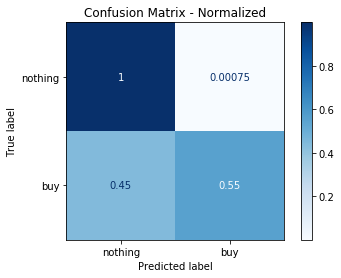

In [113]:

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, display_labels = ['nothing', 'buy','sell'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

In [114]:
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

wvol_avg       0.239421
wSignaline     0.148561
wupper_band    0.141633
wMA9           0.094230
wemafast       0.068392
wlower_band    0.059002
wMA20          0.054836
RSI            0.052838
wemaslow       0.052164
MACD           0.046008
wvwap          0.042916
dtype: float64

Text(0.5, 1.0, 'Random Forest: Feature Importance Graph')

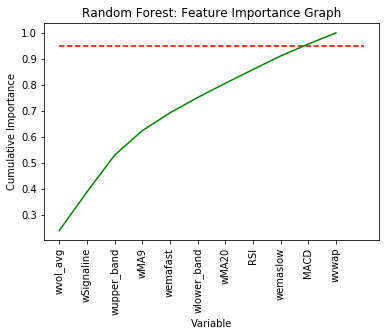

In [115]:
# store the values in a list to plot.
x_values = list(range(len(rand_frst_clf.feature_importances_)))

# Cumulative importances
cumulative_importances = np.cumsum(feature_imp.values)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin = 0, xmax = len(feature_imp), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, feature_imp.index, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Random Forest: Feature Importance Graph')